

# Project: Investigatting No Show medical appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Data set collects informations about patients making appointements and either showing up or not showing up at thier appointment day
this data set contaiins about 100k medical appointmrnts in brazil.
Neigborhood refers to the hospital location.
Scholarship indicates the enrollement of the patient in Brasillian walfare program Bolsa Familia.
The encoding of the last column states 'No' if the patient showed up at appointment day and 'Yes'  if not shown .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

loading and reading the data set

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   gender         110526 non-null  object
 1   age            110526 non-null  int64 
 2   neighbourhood  110526 non-null  object
 3   scholarship    110526 non-null  int64 
 4   hypertension   110526 non-null  int64 
 5   diabetes       110526 non-null  int64 
 6   alcoholism     110526 non-null  int64 
 7   handicap       110526 non-null  int64 
 8   smsreceived    110526 non-null  int64 
 9   noshow         110526 non-null  object
dtypes: int64(7), object(3)
memory usage: 13.3+ MB


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

ther are 110527 enteries in 14 rows.
the Data has no missing values.
in age there is an entery of -1 which is irrelevant due to large number of enteries will be removed later becouse it makes no sense that age  be in negative values
some column header spellings need to be corrected
also adjustement to them required fo easier coding process
there are no duplicate enteris to be removed


### Data Cleaning (Replace this with more specific notes!)

In [9]:
df.rename(columns={'Hipertension': 'hypertension', 'Handcap':'handicap'}, inplace=True)

correcting the spelling errors in the column headers

In [10]:
df.rename(columns= lambda x: x.lower().replace("-","").replace("_",""), inplace=True)

removing the under scores and dashes from column names also converting them to lower case to make it more easier for encoding

In [11]:
negative_age = df[df['age'] == -1]
negative_age

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
df.drop(index=99832, inplace=True)

In [13]:
df.drop(['patientid', 'appointmentid', 'scheduledday', 'appointmentday'], axis=1, inplace=True)


patientid, appointmentid, scheduledday & appointmentday these columns will be dropped

In [14]:
df.head()
df.shape

(110526, 10)

In [15]:
df['noshow'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

checking the consistency of the entery of gender and show status

The data now is cleaned , wrong spellings are corrected ,unnecessary columns are removed,and checked for consistency for gender and no show enteries. Now it consists of 10 columns 

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question : Factors influencing the showing of patients at thier appointments

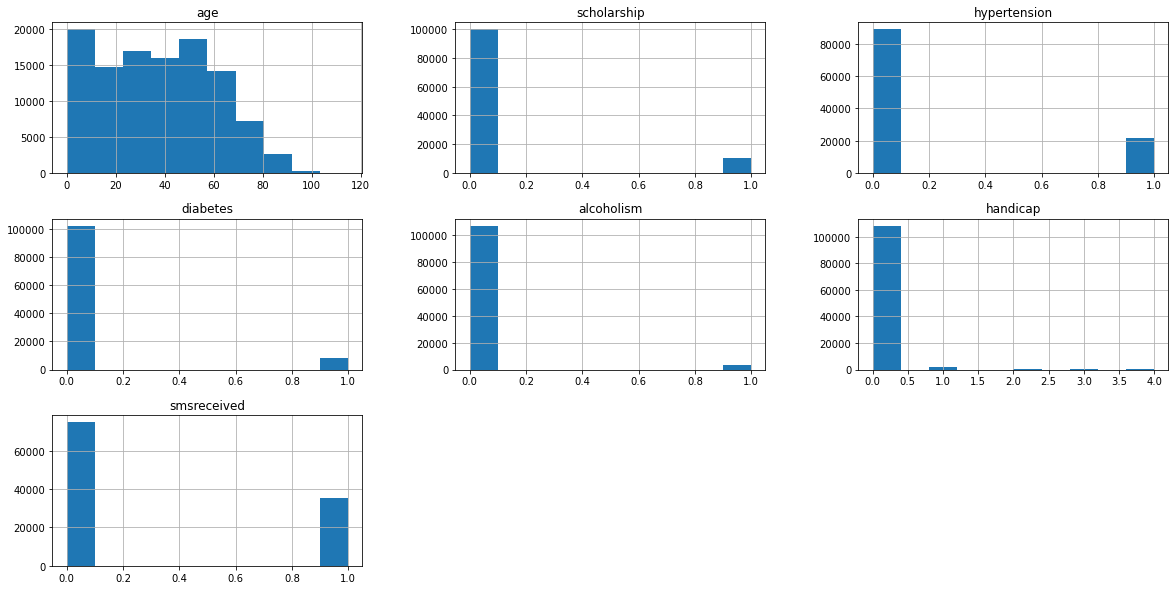

In [17]:
df.hist(figsize=(20,10));

In [18]:
df['noshow'].describe()

count     110526
unique         2
top           No
freq       88207
Name: noshow, dtype: object

**The percent of patients adhering to there medical appointements is 79.8 %
while about 20.2 % didnt show at appoitment day**

In [19]:
df_shown = df[df['noshow'] == "No"]
df_notshown = df[df['noshow'] == "Yes"]


creating new dataframes one for data of shown up patients and the other for patients didn't show up for easier comaprisons

In [20]:
def graph_plot(criteria):
    plt.figure(figsize=[12, 8])
    df_notshown[criteria].value_counts().plot(kind='bar', alpha=0.5, color='red', label='noshow')
    df_shown[criteria].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='show')
    plt.xlabel(criteria)
    plt.ylabel('patient no')
    plt.title('Relation between {} and showing to appointment'.format(criteria))
    plt.legend()
    plt.grid(False)

In [21]:
def graph_hist(criteria):
    plt.figure(figsize=[12, 8])
    df_notshown[criteria].hist(bins=6, alpha=0.5, label="noshown", color='blue')
    df_shown[criteria].hist(bins=6, alpha=0.5, label="show")
    plt.xlabel(criteria)
    plt.ylabel('patient no')
    plt.title('Relation between {} and showing to appointment'.format(criteria))
    plt.legend()
    plt.grid(False)

Creating graph equations to decrease repeated coding 

### The  Age and relation to the showing status of the patients

In [22]:
df_shown.age.describe(),df_notshown.age.describe()

(count    88207.000000
 mean        37.790504
 std         23.338645
 min          0.000000
 25%         18.000000
 50%         38.000000
 75%         56.000000
 max        115.000000
 Name: age, dtype: float64,
 count    22319.000000
 mean        34.317667
 std         21.965941
 min          0.000000
 25%         16.000000
 50%         33.000000
 75%         51.000000
 max        115.000000
 Name: age, dtype: float64)

In [23]:
print('The mean age of shown is {} while the mean age of not shown is {}'.format(df_shown['age'].mean(), df_notshown['age'].mean()))

The mean age of shown is 37.790504154999034 while the mean age of not shown is 34.31766656212196


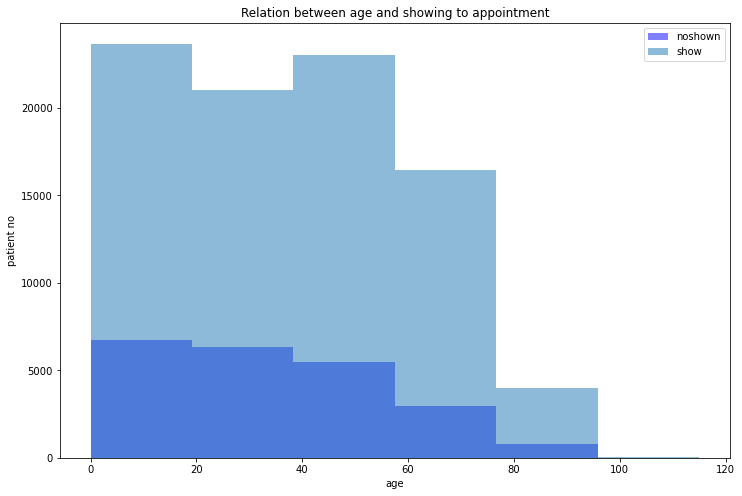

In [24]:
graph_hist('age')

The most patients keeping their appointments and showing are aged from 0 to about 20 years and from about 35 to 55 years
and The mean age of shown up is 37.79 while the mean age of those who did not show up is 34.32
There seems to be a corelation between age and attending medical appointements

### The *Neighbourhood* and relation to the showing status of the patients

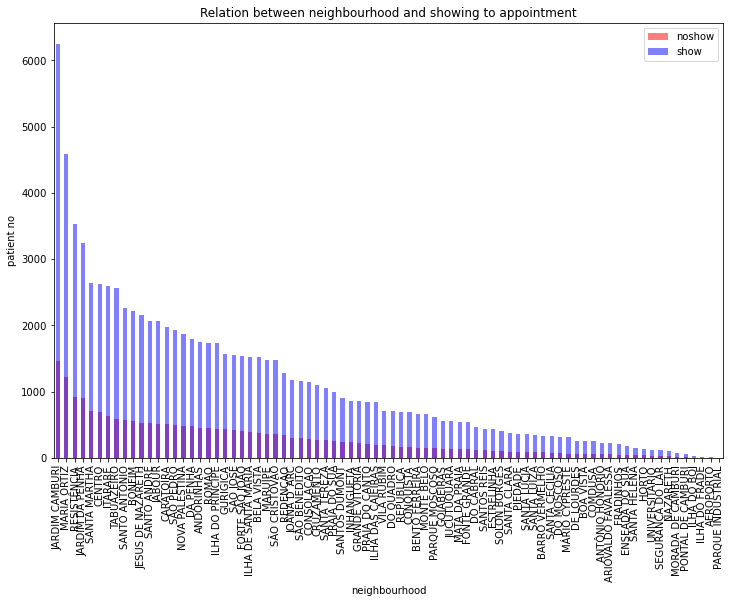

In [25]:
graph_plot('neighbourhood')

It seems  that certain neighbourhoods showing higher rate of attending patients at thier appointments
There is a corelation between Neighbourhood and attending medical appointments

### The ***Gender*** and relation to the showing status of the patients

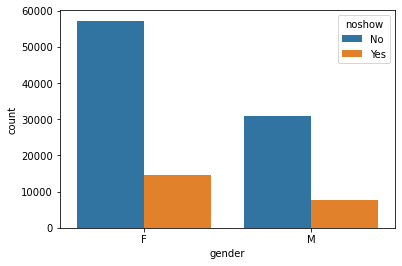

In [26]:
x =sbn.countplot(x=df['gender'], hue = df['noshow'])


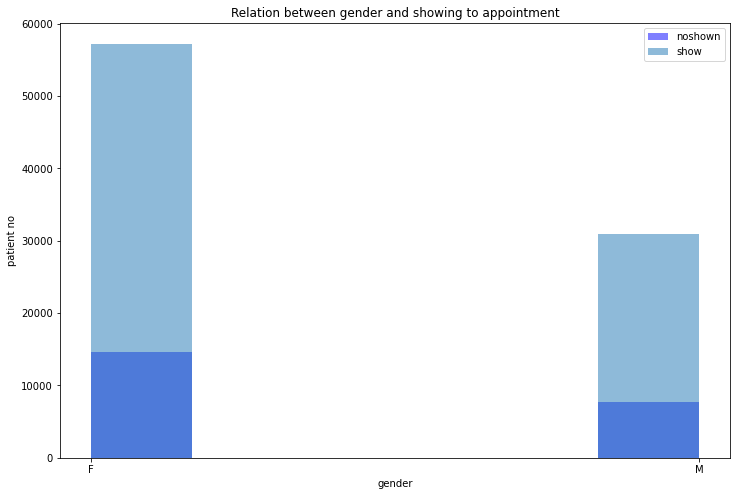

In [27]:
graph_hist('gender')

it seems like there is no corelarion between the gender of the patients and showing to medical appointment

### SMS Received and showing to appointment

In [28]:
shown_sms = df_shown[df_shown['smsreceived'] == 1]['noshow'].count().astype(int)
notshown_sms = df_notshown[df_notshown['smsreceived'] == 1]['noshow'].count().astype(int)
print('the number of patients whom recieved the sms and swhown at appointement is {} while those recieved sms and not shown are{}'.format(df_shown[df_shown['smsreceived'] == 1]['noshow'].count(), df_notshown[df_notshown['smsreceived'] == 1]['noshow'].count()))

the number of patients whom recieved the sms and swhown at appointement is 25698 while those recieved sms and not shown are9784


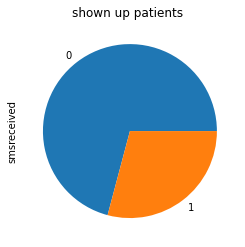

In [29]:
df_shown['smsreceived'].value_counts().plot(kind='pie',title='shown up patients ');

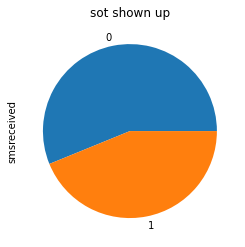

In [30]:
df_notshown['smsreceived'].value_counts().plot(kind='pie',title='sot shown up');

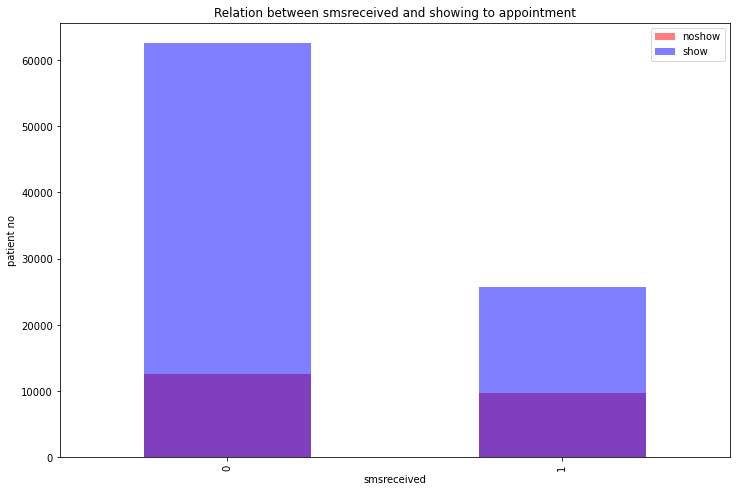

In [31]:
graph_plot('smsreceived')

The number of patients who doesn't receive a sms and shown up at thier appointments are much greater than those whom shown up and recieved a sms ,
also the total number of patients received sms is smaller than those didn't received sms.
the is no obvious correlation between recieving the sms and the attendence to the appointment
but it seems that the sms systems requires further investigation and adjustment to achieve better effectivness

### Presence of chronic disease and showing to appointment

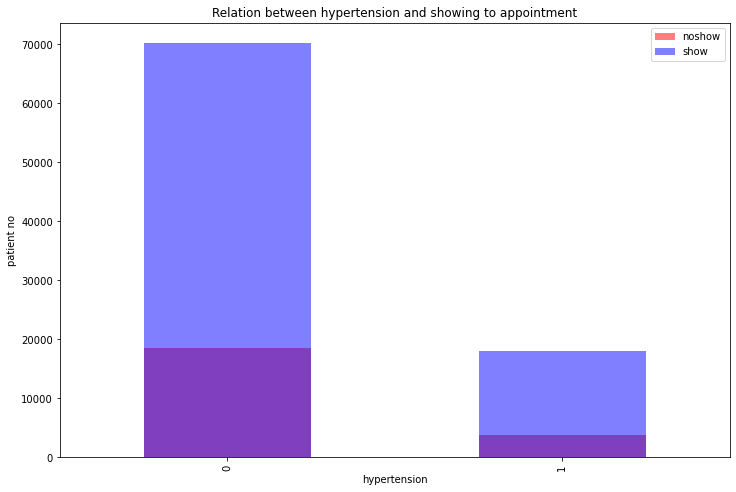

In [32]:
graph_plot('hypertension')

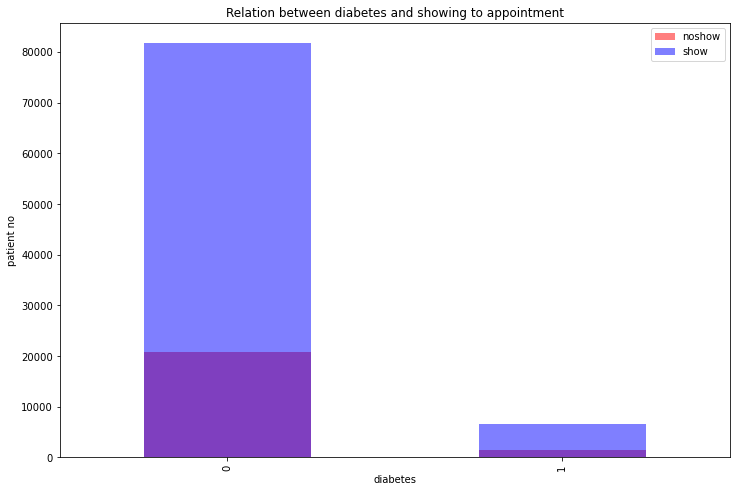

In [33]:
graph_plot('diabetes')

The number of patients who are suffering from chronic diseases is smaller than those who are not suffering from chronic diseases ,
There seems to be no obvious corelation between chronic diseases and patients attending to their appointments


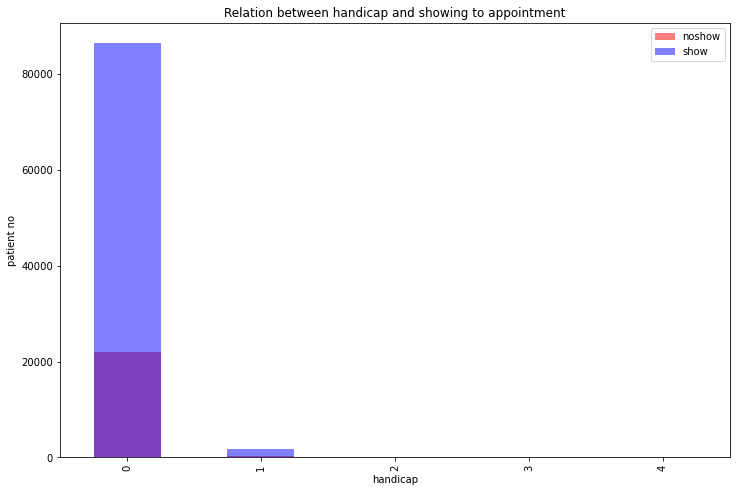

In [34]:
graph_plot('handicap')

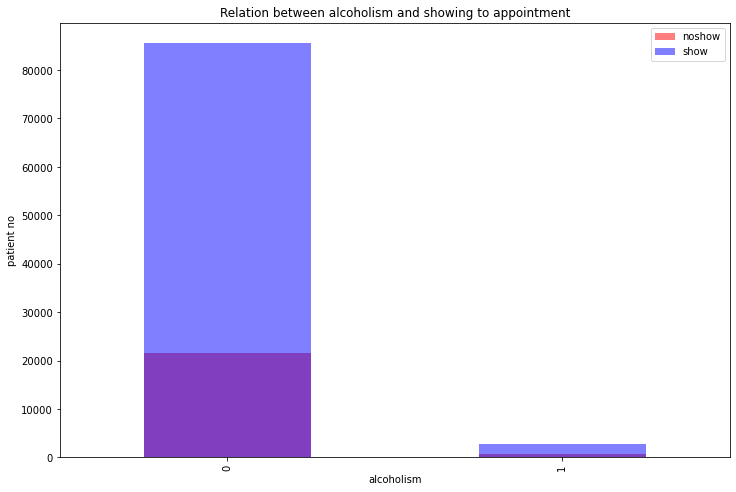

In [35]:
graph_plot('alcoholism')

no obvious corelation between alcoholism nor handicaped patients and attendance 

### Scholarship and showing to appointment

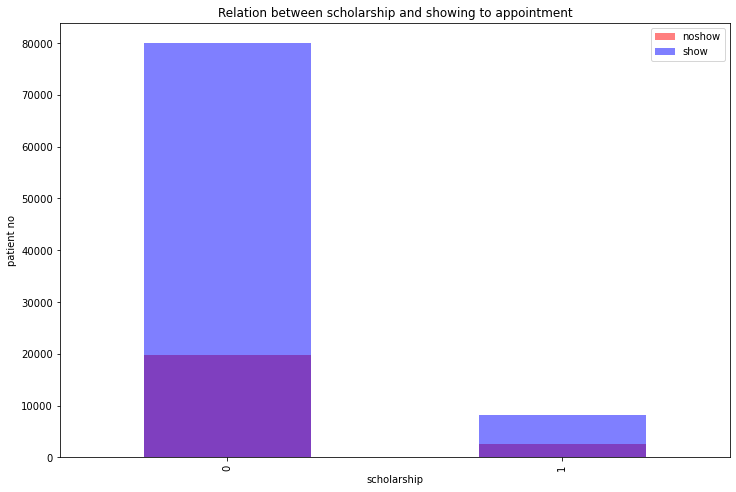

In [36]:
graph_plot('scholarship')

<a id='conclusions'></a>
## Conclusions
Most of the patients are not suffering from chronic diseases ,didn't receive sms and not enrolled in Bolsa Familia program
There seems to be no corelation between  gender, chronic diseases , alcoholism , handicap, scholarship at Bolsa Familia and showing up to  the medical appointment .
The age and the neighbourhood seems to be affecting the attendance of patients to thier medical appointements.
The effectiveness of the sms system needs to be revised to be more efficient